1. Write a Python Program to create ElasticNet Model and findout which factor is most determinig factor for diabetes in Indians.

In [1]:
# feature selection using Elastic Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import ElasticNet

In [3]:
df = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/ElasticNet_Regression/Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# drop outcome column and take remaining column as x
x = df.drop('Outcome', axis=1)

In [9]:
# take only outcome column as y
y = df['Outcome'].values

In [10]:
# take the names of the columns 
names = x.columns
names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
# range of the columns 
rng = range(len(names))
rng

range(0, 8)

In [12]:
# Create an object to Elastic Net 
es = ElasticNet(l1_ratio=0.5)

In [13]:
# train the model 
model = es.fit(x,y)

In [14]:
# find the co-efficients of terms in elastic net models equation
# the term with highest co-efficient will exert more influence
es_coef = model.coef_
print(es_coef)

[ 0.00000000e+00  6.13597246e-03 -0.00000000e+00  0.00000000e+00
 -3.55216958e-05  4.13800606e-03  0.00000000e+00  1.53019365e-03]


In [15]:
# find the position of maximum value in the co-efficients
n = np.argmax(es_coef)
n

1

In [16]:
# find the column name at nth position in x 
print('The most influencing column =',names[n])

The most influencing column = Glucose


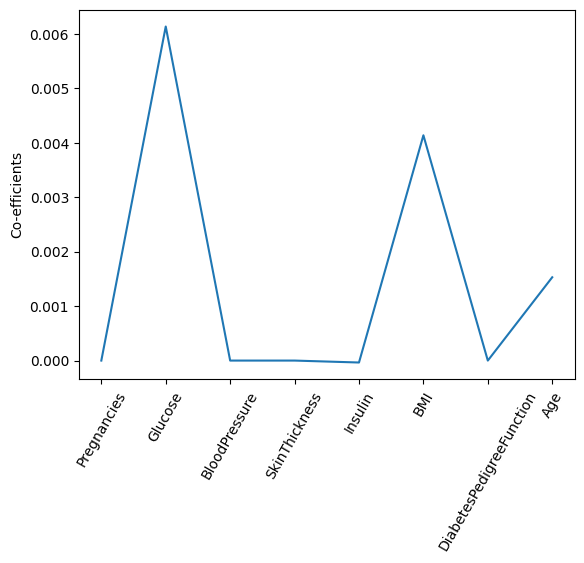

In [17]:
# draw the line plot between range and co-efficients
plt.plot(rng,es_coef)
plt.xticks(rng,names,rotation=60)
plt.ylabel('Co-efficients')
plt.show()